In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/Content - 1.xlsx')

In [ ]:
#  Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   #                     100000 non-null  int64  
 1   RAQEB_ENTITY_ID       100000 non-null  int64  
 2   MUNICIPALITY_NAME     100000 non-null  object 
 3   QUARTER_NAME          98835 non-null   object 
 4   STREET_NAME           99769 non-null   object 
 5   ACTIVITY_NAMES        98708 non-null   object 
 6   ENTITY_VISIT_ID       100000 non-null  int64  
 7   VISIT_LATITUDE        100000 non-null  float64
 8   VISIT_LONGITUDE       100000 non-null  float64
 9   INSPECTOR_ID          100000 non-null  int64  
 10  INSPECTION_START      100000 non-null  object 
 11  INSPECTION_END        100000 non-null  object 
 12  VISIT_DURATION        100000 non-null  float64
 13  VISIT_STATUS_NAME     100000 non-null  object 
 14  ENTITY_TYPE           98708 non-null   object 
 15  S

In [ ]:
df.describe()

,#,RAQEB_ENTITY_ID,ENTITY_VISIT_ID,VISIT_LATITUDE,VISIT_LONGITUDE,INSPECTOR_ID,VISIT_DURATION,APPROVED_VIOLATIONS,CANCELLED_VIOLATIONS,VIOLATION_OBJECTIONS,PENDING_VIOLATIONS
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.0,100000.000000
mean,50000.500000,1.931213e+06,3.961969e+06,24.690533,46.710850,9.009502e+06,5.84845,0.357670,0.830410,0.0,0.003410
std,28867.657797,5.563331e+05,4.140645e+04,0.096893,0.083492,2.675492e+03,10.50051,0.864795,1.301525,0.0,0.072928
min,1.000000,3.400000e+01,3.891253e+06,24.388312,46.383655,9.004421e+06,0.15000,0.000000,0.000000,0.0,0.000000
25%,25000.750000,1.400728e+06,3.926115e+06,24.606819,46.654200,9.007849e+06,1.23000,0.000000,0.000000,0.0,0.000000
50%,50000.500000,1.955156e+06,3.960794e+06,24.690719,46.711196,9.008459e+06,4.56000,0.000000,0.000000,0.0,0.000000
75%,75000.250000,2.434721e+06,3.998136e+06,24.773535,46.772066,9.012558e+06,8.41000,0.000000,1.000000,0.0,0.000000
max,100000.000000,2.766742e+06,4.033831e+06,25.976630,47.068005,9.014042e+06,2600.16000,16.000000,18.000000,0.0,4.000000


In [ ]:
df.isnull().sum()

,0
#,0
RAQEB_ENTITY_ID,0
MUNICIPALITY_NAME,0
QUARTER_NAME,1165
STREET_NAME,231
ACTIVITY_NAMES,1292
ENTITY_VISIT_ID,0
VISIT_LATITUDE,0
VISIT_LONGITUDE,0
INSPECTOR_ID,0


In [ ]:
df['ACTIVITY_NAMES'].value_counts()

,count
ACTIVITY_NAMES,
المواد الغذائيه - تموينات - 0,5130
المواد الغذائيه - محلات تقديم المشروبات (الكوفي شوب) - 0,3885
المواد الغذائيه - وجبات سريعة - تقديم وجبات وفطائر,3190
المواد الغذائيه - التموينات - 0,3100
المواد الغذائيه - مطعم - 0,3082
...,...
الجلديات ومستلزماتها - بيع أحزمة وشنط وجلديات أخرى - 0\nالمعدات والادوات والاجهزة ومستلزماتها - بيع ساعات - 0\nالملابس ومستلزماتها - بيع ملابس نسائيه و اكسـسوارات واحذيه نسائيه - 0\nانشطه اخرى - بيع عطورات وأدوات تجميل - 0,1
الملابس ومستلزماتها - بيع عبايات وطرح نسائية - 0\nالملابس ومستلزماتها - بيع ملابس أطفال جاهزة بالتجزئة - 0,1
الجلديات ومستلزماتها - بيــــع أحذية - أحذية نسائي\nالملابس ومستلزماتها - اكسسوارات - 0\nالملابس ومستلزماتها - بيع ملابس أطفال جاهزة بالتجزئة - 0\nالملابس ومستلزماتها - بيع ملابس جاهزة رجالي بالتجزئة - 0\nالملابس ومستلزماتها - بيع ملابس جاهزة نسائية بالتجزئة - 0\nانشطه اخرى - بيع العاب اطفال غير الكترونية - 0\nانشطه اخرى - بيع اواني منزلية بالتجزئة - 0\nانشطه اخرى - بيع عطورات وأدوات تجميل - 0,1


In [ ]:
df_test = df[df['ACTIVITY_NAMES'].str.startswith('المواد الغذائيه', na=False)]
df_test['ACTIVITY_NAMES'].value_counts().head(50)

,count
ACTIVITY_NAMES,
المواد الغذائيه - تموينات - 0,5130
المواد الغذائيه - محلات تقديم المشروبات (الكوفي شوب) - 0,3885
المواد الغذائيه - وجبات سريعة - تقديم وجبات وفطائر,3190
المواد الغذائيه - التموينات - 0,3100
المواد الغذائيه - مطعم - 0,3082
المواد الغذائيه - بيع حلويات - 0,2448
المواد الغذائيه - مقهى فئة ( أ ) مشروبات ومأكولات خفيفة مسبقة الصنع - 0,2178
المواد الغذائيه - البوفيهات - 0,1768
المواد الغذائيه - مطعم داخل مجمع سكني مغلق ( كمباوند ) - 0,1721


 Data cleaning

In [5]:
df = df.drop(columns=['#', 'RAQEB_ENTITY_ID', 'ENTITY_VISIT_ID']) # unnecessary columns for analysis

In [6]:
df.head()

,MUNICIPALITY_NAME,QUARTER_NAME,STREET_NAME,ACTIVITY_NAMES,VISIT_LATITUDE,VISIT_LONGITUDE,INSPECTOR_ID,INSPECTION_START,INSPECTION_END,VISIT_DURATION,VISIT_STATUS_NAME,ENTITY_TYPE,SECTION_NAME,TASK_TYPE_NAME,APPROVED_VIOLATIONS,CANCELLED_VIOLATIONS,VIOLATION_OBJECTIONS,PENDING_VIOLATIONS
0,بلدية شمال الرياض,حي النرجس,شارع رقم 377,المواد الغذائيه - وجبات سريعة - تقديم وجبات وف...,24.835902,46.679642,9012748,2022-12-31 23:39:29,2022-12-31 23:42:53,3.40,موجود,صحي,الطواريء,غير مجدولة,0,0,0,0
1,بلدية المعذر,حي العليا,شارع التخصصي,المواد الغذائيه - مطعم - 0,24.681804,46.677233,9008129,2022-12-31 23:25:04,2022-12-31 23:47:17,22.21,موجود,صحي,الرقابة الصحية في البلديات,مجدولة,0,1,0,0
2,بلدية شمال الرياض,حي الربيع,طريق ابي بكر الصديق,المواد الغذائيه - اسواق مركزية - 0,24.808187,46.669257,9012748,2022-12-31 23:13:56,2022-12-31 23:22:08,8.20,موجود,صحي,الطواريء,غير مجدولة,0,0,0,0
3,بلدية العليا,حي المروج,شارع ابن سينا,انشطه اخرى - محل كماليات - 0,24.758402,46.666924,9008611,2022-12-31 23:11:38,2022-12-31 23:21:22,9.73,موجود,تجاري,الطواريء,غير مجدولة,0,0,0,0
4,بلدية المعذر,حي العليا,شارع التخصصي,المواد الغذائيه - مطعم - 0,24.683065,46.676548,9008129,2022-12-31 23:08:39,2022-12-31 23:24:38,15.98,موجود,صحي,الرقابة الصحية في البلديات,مجدولة,2,5,0,0


In [7]:
df['ACTIVITY_NAMES'] = df['ACTIVITY_NAMES'].str.replace(r'\d+', '', regex=True) # remove numbers
df['ACTIVITY_NAMES'] = df['ACTIVITY_NAMES'].str.replace('\n', ' ', regex=True) # remove (\n)

In [8]:
# بوفيه

df_check = df[df['ACTIVITY_NAMES'].str.contains('بوفيه', na=False)]
df_check['ACTIVITY_NAMES'].unique()
# Note that these values ​​must be unified to obtain a good analysis.

array(['المواد الغذائيه - بوفيه - سندوتشات',
       'المواد الغذائيه - بوفيه - حمص', 'المواد الغذائيه - بوفيه - تسالى',
       'المواد الغذائيه - بوفيه - سندوتشات المواد الغذائيه - بوفيه - عصيرات',
       'المواد الغذائيه - بوفيه - فول وفلافل',
       'المواد الغذائيه - البوفيهات - ',
       'المواد الغذائيه - بوفيه - تسالى المواد الغذائيه - بوفيه - عصيرات',
       'المواد الغذائيه - بوفيه - كبدة',
       'المواد الغذائيه - بوفيه - عصيرات',
       'المخابز ومستلزماتها - مخبز تميس -  المواد الغذائيه - بوفيه - فول وفلافل',
       'المواد الغذائيه - بوفيه - كنافة',
       'المواد الغذائيه - بوفيه - فول وفلافل المواد الغذائيه - بوفيه - مطبق',
       'المواد الغذائيه - بوفيه - فول وفلافل المواد الغذائيه - بوفيه - كبدة',
       'المواد الغذائيه - بوفيه - سندوتشات المواد الغذائيه - بوفيه - فول وفلافل المواد الغذائيه - وجبات سريعة - بروستد المواد الغذائيه - وجبات سريعة - فطائر ومعجنات',
       'المواد الغذائيه - بوفيه - سندوتشات المواد الغذائيه - بوفيه - عصيرات المواد الغذائيه - وجبات سريعة - 

In [9]:
df.loc[df['ACTIVITY_NAMES'].str.contains('بوفيه', na=False), 'ACTIVITY_NAMES'] = 'المواد الغذائيه - بوفيه' # unify the values

In [ ]:
df_check = df[df['ACTIVITY_NAMES'].str.contains('بوفيه', na=False)]
df_check['ACTIVITY_NAMES'].unique()

array(['المواد الغذائيه - بوفيه'], dtype=object)

-----------------------

In [ ]:
# تموينات

df_check = df[df['ACTIVITY_NAMES'].str.contains('تموينات', na=False)]
df_check['ACTIVITY_NAMES'].unique()
# Note that these values ​​must be unified to obtain a good analysis.

array(['المواد الغذائيه - تموينات - ', 'المواد الغذائيه - التموينات - ',
       'المواد الغذائيه - تموينات ضمن محطة وقود - ',
       'المواد الغذائيه - بيع المواد الغذائية بالجملة -  المواد الغذائيه - تموينات - ',
       'المخابز ومستلزماتها - مخبز نصف آلي -  المواد الغذائيه - تموينات - ',
       'المواد الغذائيه - بيع تمور -  المواد الغذائيه - تموينات -  المواد الغذائيه - خضار وفواكه - ',
       'المواد الغذائيه - التموينات -  المواد الغذائيه - بيع الزيت والسمن النباتي -  المواد الغذائيه - بيع قهوة (جافة) -  المواد الغذائيه - محمصة ومكسرات - ',
       'المواد الغذائيه - بيع منتجات الألبان -  المواد الغذائيه - تموينات -  المواد الغذائيه - خضار وفواكه -  المواد الغذائيه - محمصة ومكسرات - ',
       'المواد الغذائيه - تموينات -  المواد الغذائيه - خضار وفواكه - ',
       'المواد الغذائيه - بيع منتجات الألبان -  المواد الغذائيه - تموينات -  المواد الغذائيه - خضار وفواكه - ',
       'السيارات ومستلزماتها - صيانة خفيفة -  السيارات ومستلزماتها - صيانة وإصلاح وتبديل اطارات السيارات الخفيفة ( ال

In [10]:
df.loc[df['ACTIVITY_NAMES'].str.contains('تموينات', na=False), 'ACTIVITY_NAMES'] = 'المواد الغذائيه - تموينات' # unify the values

In [ ]:
df_check = df[df['ACTIVITY_NAMES'].str.contains('بوفيه', na=False)]
df_check['ACTIVITY_NAMES'].unique()

array(['المواد الغذائيه - بوفيه'], dtype=object)

----------------------------------

In [ ]:
# وجبات سريعة

df_check = df[df['ACTIVITY_NAMES'].str.contains('وجبات سريعة', na=False)]
df_check['ACTIVITY_NAMES'].unique()
# Note that these values ​​must be unified to obtain a good analysis.

array(['المواد الغذائيه - وجبات سريعة - تقديم وجبات وفطائر',
       'المواد الغذائيه - وجبات سريعة - برجر',
       'المواد الغذائيه - وجبات سريعة - تقديم وجبات وعصائر',
       'المواد الغذائيه - وجبات سريعة - بروستد',
       'المواد الغذائيه - وجبات سريعة - موقوف',
       'المواد الغذائيه - وجبات سريعة - شاورما',
       'المواد الغذائيه - وجبات سريعة - مشويات',
       'المواد الغذائيه - وجبات سريعة - فطائر ومعجنات',
       'المواد الغذائيه - وجبات سريعة - فطائر ومعجنات المواد الغذائيه - وجبات سريعة - مشويات',
       'المواد الغذائيه - وجبات سريعة - أسماك المواد الغذائيه - وجبات سريعة - بروستد',
       'المواد الغذائيه - وجبات سريعة (منتو ويغمش) - ',
       'المواد الغذائيه - وجبات سريعة - برجر المواد الغذائيه - وجبات سريعة - بروستد المواد الغذائيه - وجبات سريعة - تقديم وجبات وعصائر المواد الغذائيه - وجبات سريعة - شاورما',
       'المواد الغذائيه - مطعم -  المواد الغذائيه - وجبات سريعة - بروستد المواد الغذائيه - وجبات سريعة - فطائر ومعجنات',
       'المواد الغذائيه - وجبات سريعة - بروست

In [11]:
df.loc[df['ACTIVITY_NAMES'].str.contains('وجبات سريعة', na=False), 'ACTIVITY_NAMES'] = 'المواد الغذائيه - وجبات سريعة' # unify the values

In [ ]:
#  خضار وفواكه

df_check = df[df['ACTIVITY_NAMES'].str.contains('خضار وفواكه', na=False)]
df_check['ACTIVITY_NAMES'].unique()

array(['المواد الغذائيه - خضار وفواكه - ',
       'المواد الغذائيه - بيع تمور -  المواد الغذائيه - خضار وفواكه - ',
       'اللحوم والدواجن والاسماك - بيع دواجن مبردة ومجمدة وتسويق بيض -  المواد الغذائيه - خضار وفواكه - ',
       'المواد الغذائيه - اسواق مركزية -  المواد الغذائيه - خضار وفواكه - ',
       'المواد الغذائيه - اسواق مركزية -  المواد الغذائيه - بيع المواد الغذائية بالجملة -  المواد الغذائيه - خضار وفواكه - ',
       'اللحوم والدواجن والاسماك - بيع لحوم المبردة -  المخابز ومستلزماتها - مخبز عادي -  المواد الغذائيه - بيع المواد الغذائية بالجملة -  المواد الغذائيه - خضار وفواكه - ',
       'اللحوم والدواجن والاسماك - بيع دواجن مبردة ومجمدة وتسويق بيض -  المواد الغذائيه - بيع تمور -  المواد الغذائيه - خضار وفواكه - ',
       'المواد الغذائيه - بيع المواد الغذائية بالجملة -  المواد الغذائيه - خضار وفواكه - ',
       'اللحوم والدواجن والاسماك - بيع دواجن مبردة ومجمدة وتسويق بيض -  المواد الغذائيه - تقطيع وتعبئة الخضار -  المواد الغذائيه - خضار وفواكه - ',
       'اللحوم والدواجن

In [12]:
df.loc[df['ACTIVITY_NAMES'].str.contains('خضار وفواكه', na=False), 'ACTIVITY_NAMES'] = 'المواد الغذائيه - خضار وفواكه' # unify the values

In [ ]:
# مطعم

df_check = df[df['ACTIVITY_NAMES'].str.contains('مطعم', na=False)]
df_check['ACTIVITY_NAMES'].unique()

array(['المواد الغذائيه - مطعم - ', 'المواد الغذائيه - مطعم بخاري - ',
       'المواد الغذائيه - مطعم حنيذ - ',
       'المواد الغذائيه - مطعم مضغوط - ',
       'المواد الغذائيه - مطعم داخل مجمع سكني مغلق ( كمباوند ) - ',
       'المواد الغذائيه - مطعم هندي - ',
       'المواد الغذائيه - مطعم - تقديم اطعمة حمية',
       'المواد الغذائيه - مطعم وصالة طعام - ',
       'المواد الغذائيه - مطعم نسائى - ',
       'المواد الغذائيه - مطعم مشويات - ',
       'المواد الغذائيه - مطعم مندي - ',
       'المواد الغذائيه - مطعم بروستد - ',
       'المواد الغذائيه - مطعم -  المواد الغذائيه - مقهى فئة ( أ ) مشروبات ومأكولات خفيفة مسبقة الصنع - ',
       'المواد الغذائيه - مطابخ إعداد الولائم للحفلات -  المواد الغذائيه - مطعم - ',
       'المواد الغذائيه - مطابخ إعداد الولائم للحفلات -  المواد الغذائيه - مطعم مندي - ',
       'المواد الغذائيه - قلي وشوي أسماك -  المواد الغذائيه - مطعم - ',
       'اللحوم والدواجن والاسماك - بيع أسماك طازجة -  المواد الغذائيه - مطعم - ',
       'المواد الغذائيه - مطعم - 

In [ ]:
df.loc[df['ACTIVITY_NAMES'].str.contains('مطعم', na=False), 'ACTIVITY_NAMES'] = 'المواد الغذائيه - مطعم' # unify the values

In [ ]:
# عصائر

df_check = df[df['ACTIVITY_NAMES'].str.contains('عصائر', na=False) | df['ACTIVITY_NAMES'].str.contains('عصـير', na=False) ]
df_check['ACTIVITY_NAMES'].unique()

array(['المواد الغذائيه - محل عصـير قصـب سـكر - ',
       'المواد الغذائيه - بيع عصائر طبيعية - ',
       'المواد الغذائيه - بيع عصائر طازجة - ',
       'انشطه اخرى - البيع بالجملة للمياه الغازية والعصائر - ',
       'المواد الغذائيه - عصائر طازجة - ',
       'المواد الغذائيه - إعداد قهوة -  المواد الغذائيه - إعداد وبيع شاي -  المواد الغذائيه - بيع عصائر طازجة -  المواد الغذائيه - مقهى فئة ( أ ) مشروبات ومأكولات خفيفة مسبقة الصنع - ',
       'انشطه اخرى - البيع بالتجزئة من خلال الأجهزة الآلية للخدمة الذاتية ، يشمل ( أجهزة الكافي والعصائر وغيرها )  - ',
       'المواد الغذائيه - بيع آيسكريم -  المواد الغذائيه - عصائر طازجة - ',
       'المواد الغذائيه - بيع عصائر طازجة -  المواد الغذائيه - بيع عصائر طبيعية - ',
       'المواد الغذائيه - عصائر طازجة -  المواد الغذائيه - محل عصـير قصـب سـكر - ',
       'المواد الغذائيه - بيع عصائر طبيعية -  المواد الغذائيه - محل عصـير قصـب سـكر - '],
      dtype=object)

In [13]:
df.loc[df['ACTIVITY_NAMES'].str.contains('عصائر', na=False) | df['ACTIVITY_NAMES'].str.contains('عصـير', na=False), 'ACTIVITY_NAMES'] = 'المواد الغذائيه - عصائر طازجة' # unify the values

Handling missing values

In [ ]:
df.isnull().sum()

,0
MUNICIPALITY_NAME,0
QUARTER_NAME,1165
STREET_NAME,231
ACTIVITY_NAMES,1292
VISIT_LATITUDE,0
VISIT_LONGITUDE,0
INSPECTOR_ID,0
INSPECTION_START,0
INSPECTION_END,0
VISIT_DURATION,0


In [14]:
df.dropna(inplace=True)

# للتعامل مع البيانات المفقوده يوجد عدة طرق
# احدها ملئ البيانات المفقوده بالقيمه الاكثر تكرارا او استخدام طرق تعلم الاله
# لكن للتحليل والتاكد من ان جميع البيانات صحيحه قمت بحذف الصفوف التي تحتوي على البيانات المفقوده

In [15]:
df.isnull().sum()

,0
MUNICIPALITY_NAME,0
QUARTER_NAME,0
STREET_NAME,0
ACTIVITY_NAMES,0
VISIT_LATITUDE,0
VISIT_LONGITUDE,0
INSPECTOR_ID,0
INSPECTION_START,0
INSPECTION_END,0
VISIT_DURATION,0


In [ ]:
df['SECTION_NAME'].value_counts()

,count
SECTION_NAME,
الرقابة الصحية في البلديات,69265
متابعة المنشآت,24786
الطواريء,4431


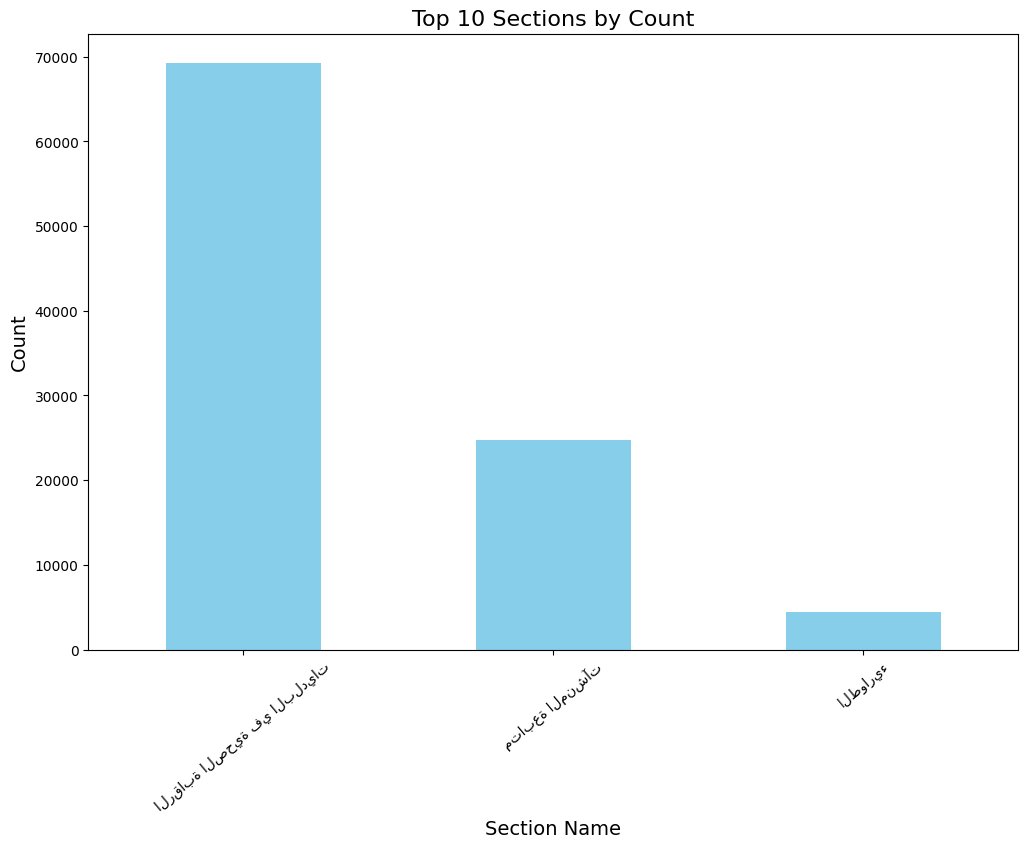

In [24]:
section_counts = df['SECTION_NAME'].value_counts().head(10)


section_counts = df['SECTION_NAME'].value_counts().head(10)
plt.figure(figsize=(12, 8))

section_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sections by Count', fontsize=16)
plt.xlabel('Section Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=40)
plt.show()

# توضح الرسمه البيانيه بالاسفل توزيع الاقسام للحصول على البيانات
# وتظهر ان اكثر قسم هو الرقابه الصحيه بالبلديات

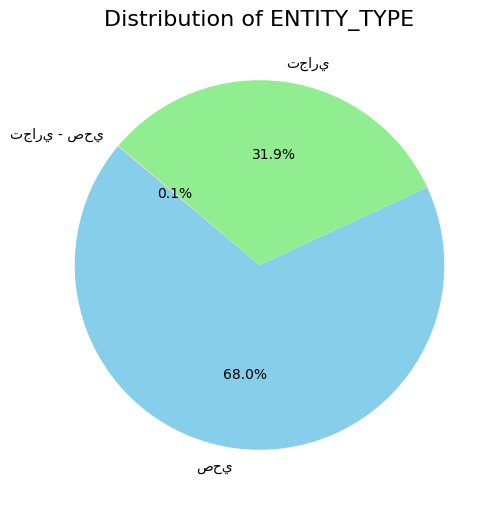

In [27]:
plt.figure(figsize=(10, 6))
df['ENTITY_TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'pink'])
plt.title('Distribution of ENTITY_TYPE', fontsize=16)
plt.ylabel('')
plt.show()

# توضح الرسمه البيانيه بالاسفل ان نسبه كثيره من البيانات كانت من نوع صحي

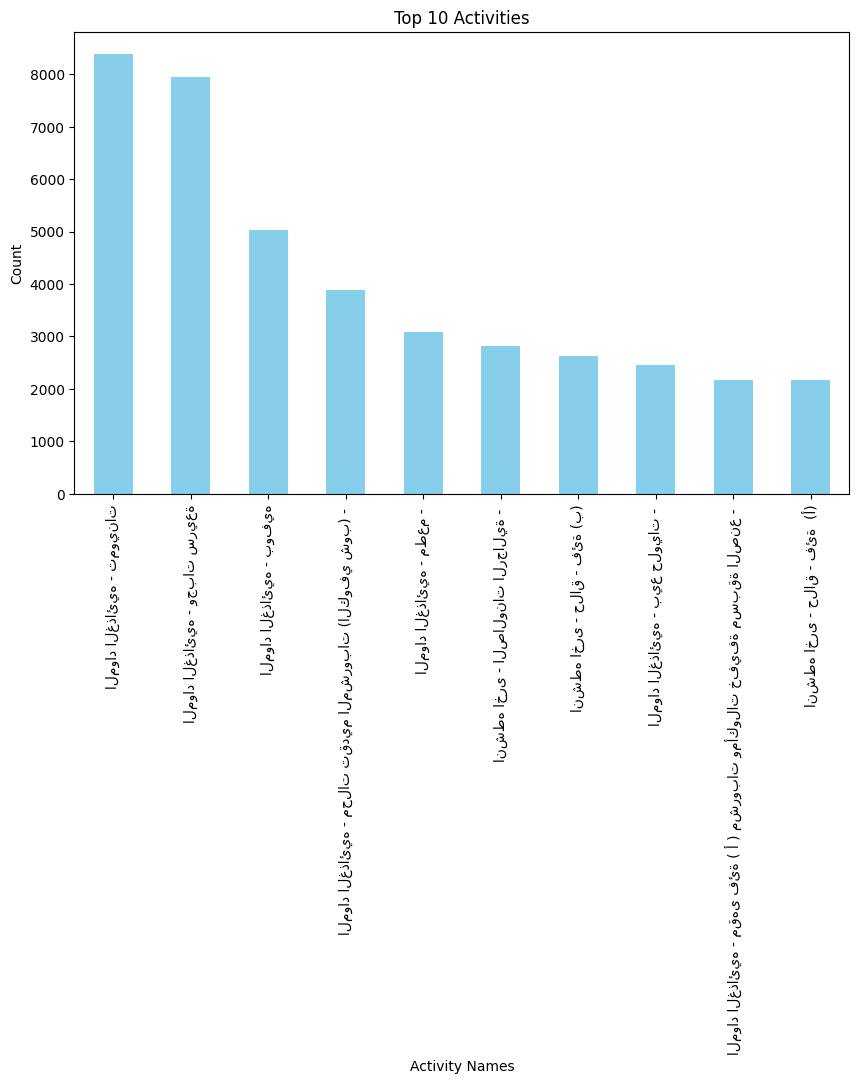

In [29]:
df['ACTIVITY_NAMES'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Activities')
plt.xlabel('Activity Names')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# إذا كنا نرغب في معرفة الأنشطة التي لدينا أكبر عدد من السجلات لها.

In [ ]:
!pip install folium -q

In [ ]:
import folium
from folium.plugins import HeatMap


map_center = [df['VISIT_LATITUDE'].mean(), df['VISIT_LONGITUDE'].mean()]
m = folium.Map(location=map_center, zoom_start=12)


for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['VISIT_LATITUDE'], row['VISIT_LONGITUDE']],
        radius=5,
        color='red' if row['APPROVED_VIOLATIONS'] > 0 else 'blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Violations: {row['APPROVED_VIOLATIONS']}"
    ).add_to(m)


heat_data = df[['VISIT_LATITUDE', 'VISIT_LONGITUDE', 'APPROVED_VIOLATIONS']].values.tolist()


heat_map = folium.Map(location=map_center, zoom_start=12)
HeatMap(heat_data, radius=10).add_to(heat_map)

heat_map.save("violations_heatmap.html")


heat_map

# توضح هذي الخريطه الاماكن الجغرافيه لجميع الانشطه التجاريه التي اثبت ان لديها مخالفات

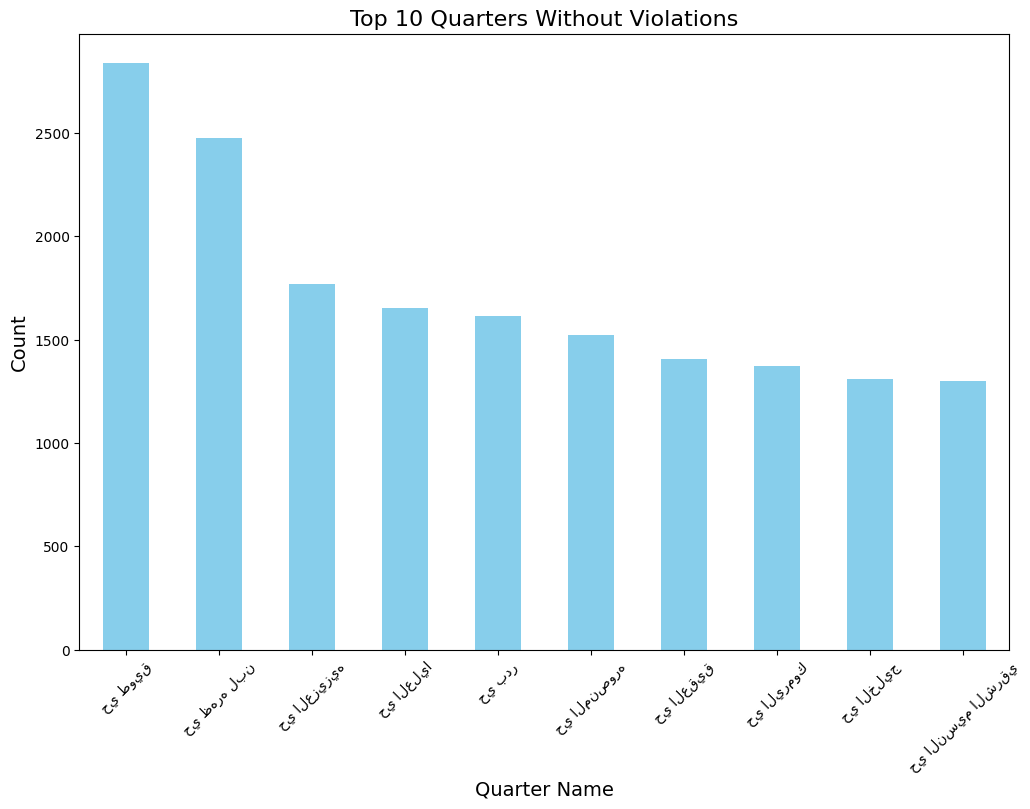

In [30]:

quarters_without_violations = df[df['APPROVED_VIOLATIONS'] == 0]


quarters_count = quarters_without_violations['QUARTER_NAME'].value_counts().head(10)


plt.figure(figsize=(12, 8))
quarters_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Quarters Without Violations', fontsize=16)
plt.xlabel('Quarter Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


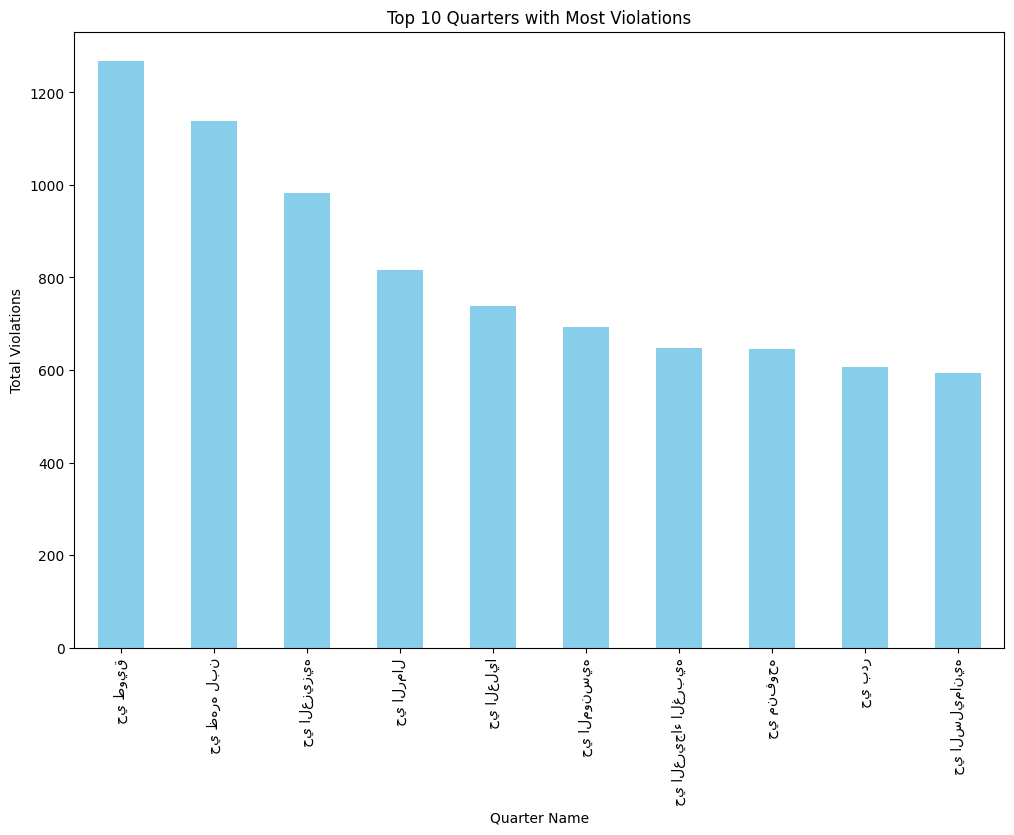

In [32]:
violations_by_quarter = df.groupby('QUARTER_NAME')['APPROVED_VIOLATIONS'].sum().sort_values(ascending=False).head(10)


violations_by_quarter.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Top 10 Quarters with Most Violations')
plt.xlabel('Quarter Name')
plt.ylabel('Total Violations')
plt.xticks(rotation=90)
plt.show()

# توضح الرسمه بالاعلى وهذي الرسمه ان اكثر حي فيه مخالفات مثبته هو حي طويق و ايضا اكثر حي لا يوجد به مخالفات مثبته هو ايضا حي طويق
# بعد البحث تبين ان بالاساس البيانات اغلبها كانت في حي طويق

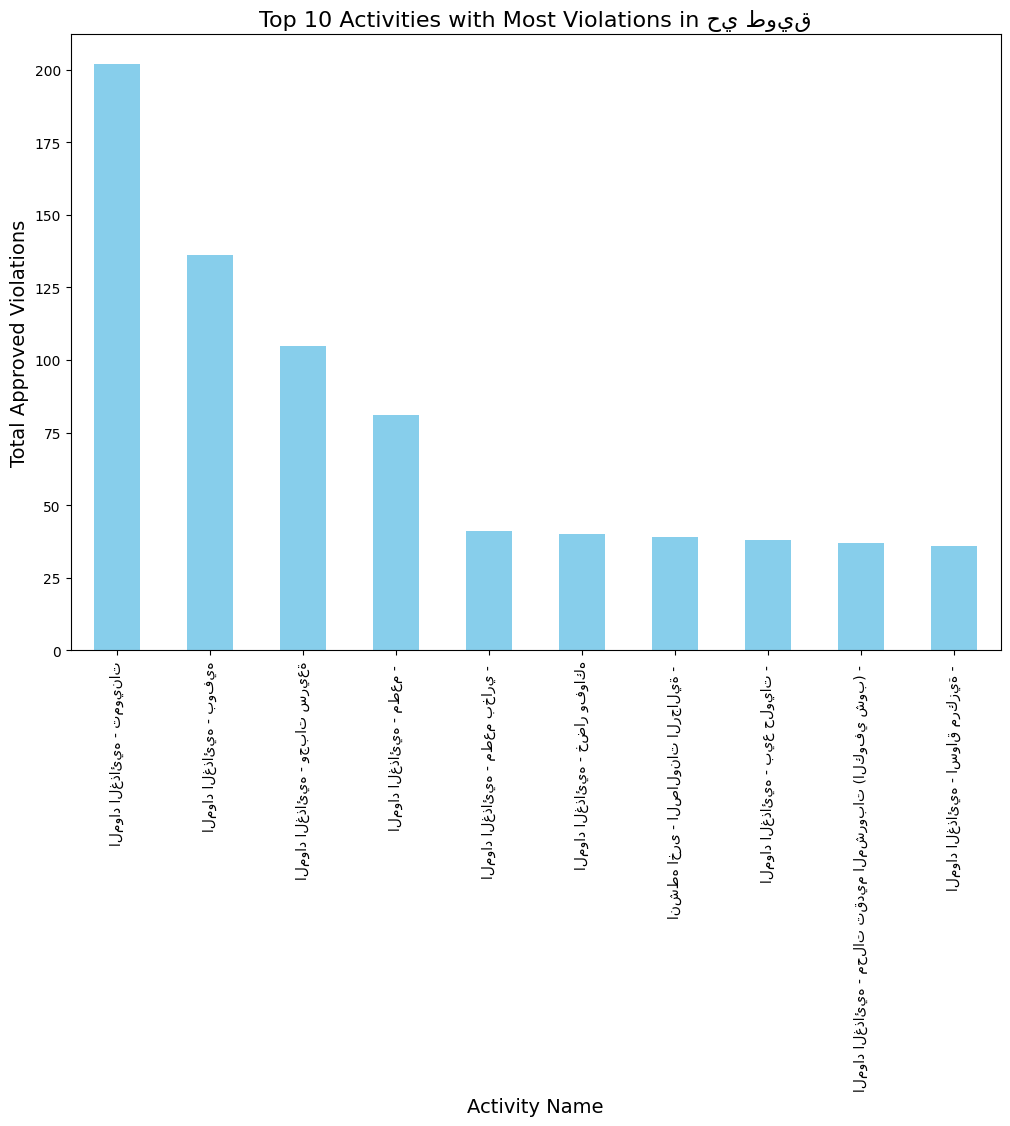

In [33]:

most_violations_quarter = 'حي طويق'
quarter_filtered_data = df[df['QUARTER_NAME'] == most_violations_quarter]


activities_in_quarter = quarter_filtered_data.groupby('ACTIVITY_NAMES')['APPROVED_VIOLATIONS'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
activities_in_quarter.plot(kind='bar', color='skyblue')
plt.title(f'Top 10 Activities with Most Violations in {most_violations_quarter}', fontsize=16)
plt.xlabel('Activity Name', fontsize=14)
plt.ylabel('Total Approved Violations', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# بما ان حي طويق هو اكثر حي حصلت فيه مخالفات
# نريد ان نعرف ماهي انواع الانشطه الاكثر ارتكابا للمخالفات في طويق


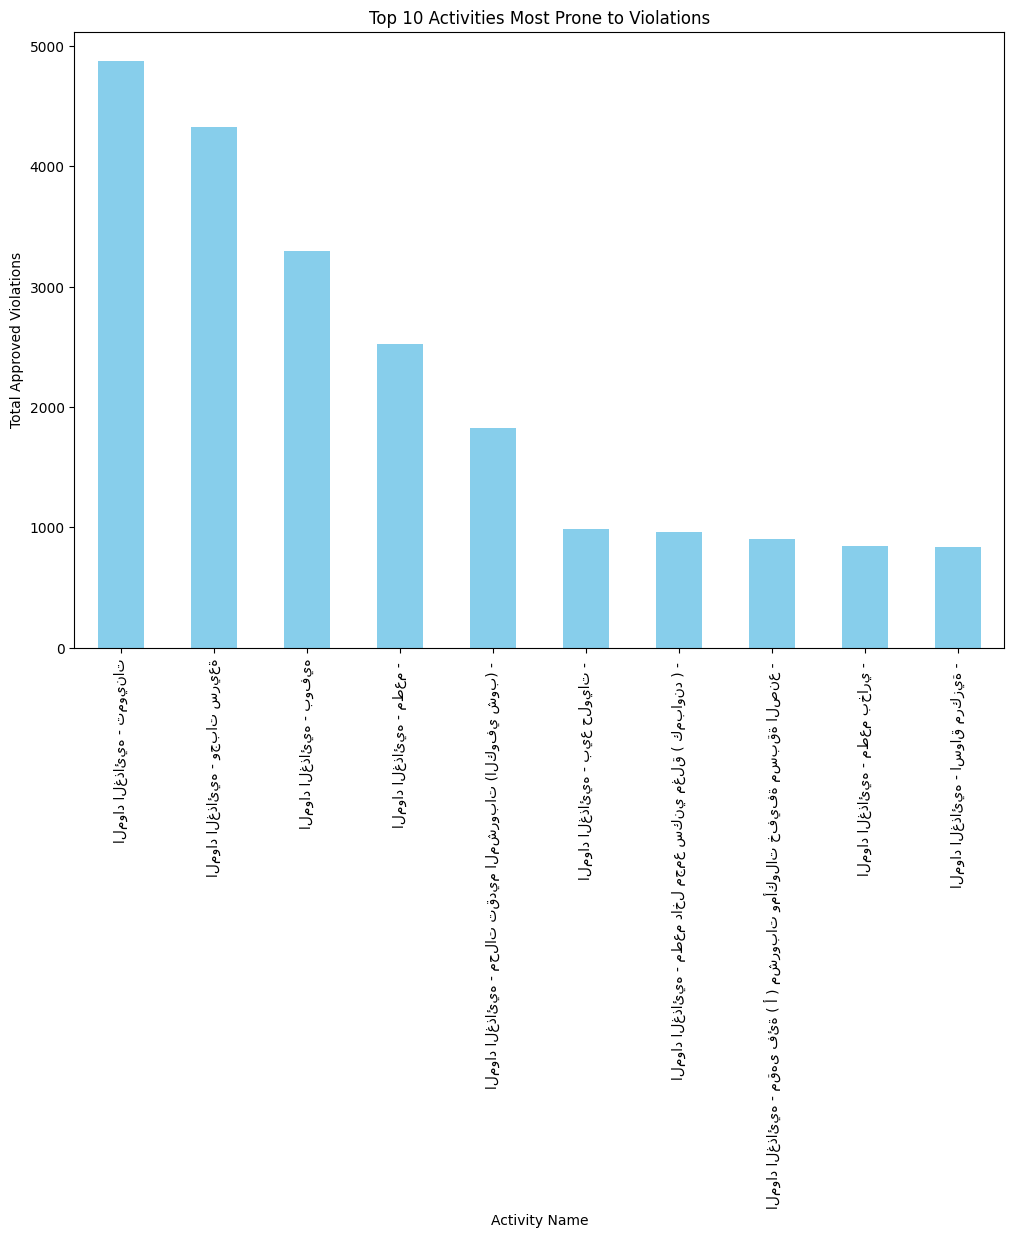

In [34]:
violations_by_activity = df.groupby('ACTIVITY_NAMES')['APPROVED_VIOLATIONS'].sum().sort_values(ascending=False).head(10)


violations_by_activity.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Top 10 Activities Most Prone to Violations')
plt.xlabel('Activity Name')
plt.ylabel('Total Approved Violations')
plt.xticks(rotation=90)
plt.show()

# اذا كننا نريد الاطلاع على اكثر الانشطه المثبت ان لها مخالفات
# الرسمه البيانيه بالاسفل توضح ان المطاعم والتموينات هم اكثر الانشطه المرتكبين للمخالفات

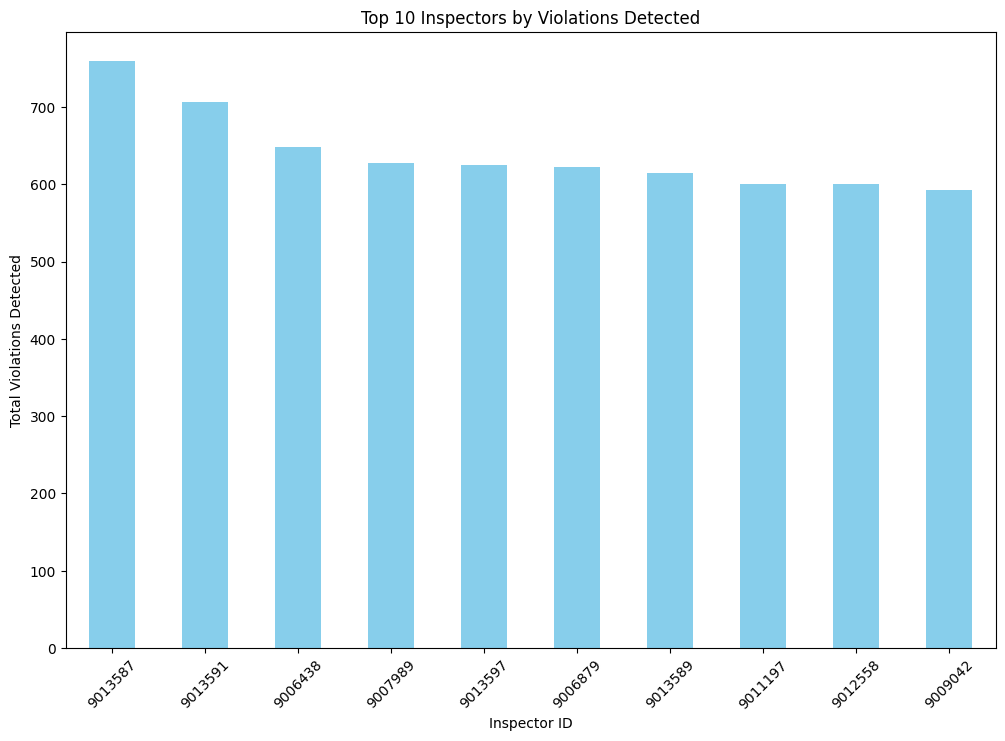

In [35]:
# المخالفات اللي اكتشفها كل مفتش
inspector_performance = df.groupby('INSPECTOR_ID')['APPROVED_VIOLATIONS'].sum().sort_values(ascending=False).head(10)


inspector_performance.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Top 10 Inspectors by Violations Detected')
plt.xlabel('Inspector ID')
plt.ylabel('Total Violations Detected')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['MUNICIPALITY_NAME'].value_counts()

,count
MUNICIPALITY_NAME,
بلدية الروضه,16787
بلدية شمال الرياض,11847
بلدية البطحاء,11655
بلدية العليا,9453
بلدية نمار,6355
بلدية العريجاء,6309
بلدية النسيم,5195
بلدية الشفاء,4780
بلدية الملز,4325


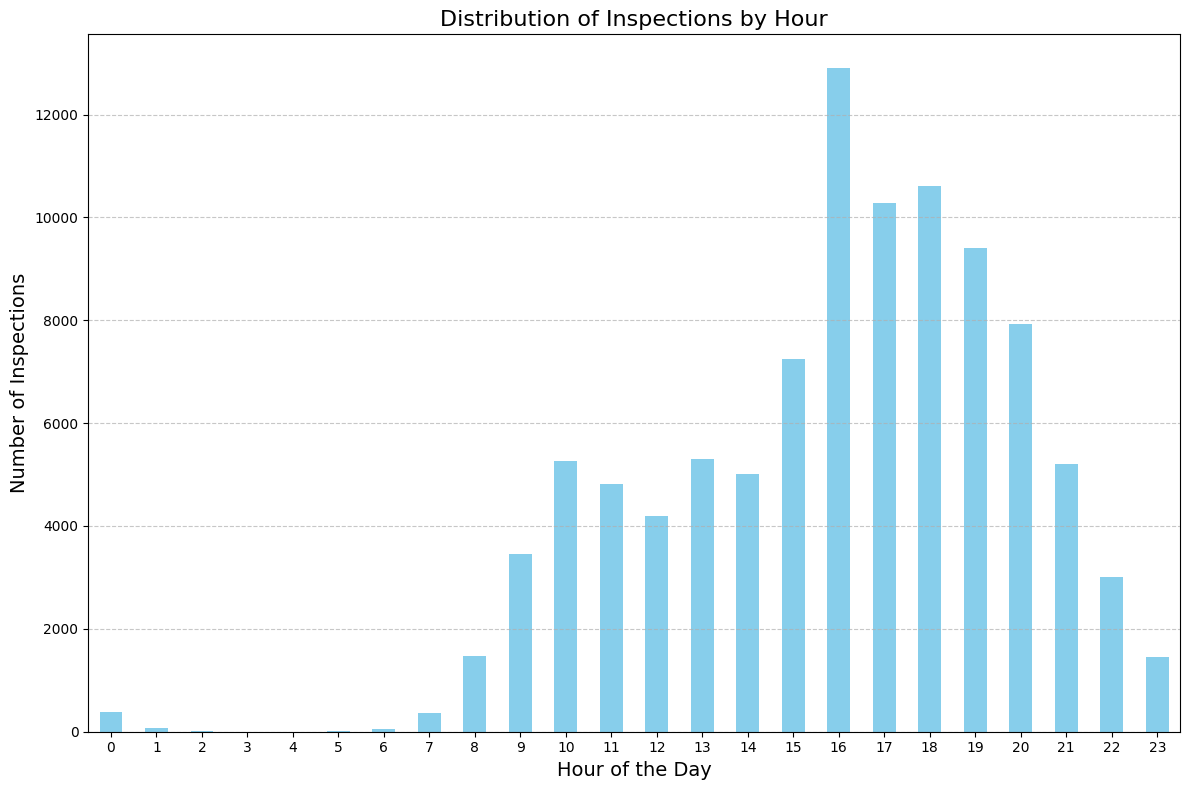

The most common inspection hour is: 16:00


In [36]:

df['INSPECTION_START'] = pd.to_datetime(df['INSPECTION_START'])


df['INSPECTION_HOUR'] = df['INSPECTION_START'].dt.hour


most_common_hour = df['INSPECTION_HOUR'].mode()[0]


inspection_by_hour = df['INSPECTION_HOUR'].value_counts().sort_index()


plt.figure(figsize=(12, 8))
inspection_by_hour.plot(kind='bar', color='skyblue')
plt.title('Distribution of Inspections by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Inspections', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print(f"The most common inspection hour is: {most_common_hour}:00")


# اذا كننا نريد ان نعرف ماهي اكثر الساعات التي تحصل فيها تفتيشات
# توضح لنا الرسمه بالاسفل انها الساعه الرابعه هي الساعه التي تحصل فيها اكثر التفتيشات